# Work Sample Assesment - AI
#### Author: Pranav Jadhav
---
### Part 1: Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# Load data
order_data = pd.read_csv("order_data.csv")
# Convert year to int
order_data["Year"] = order_data["Year"].str[-1].astype(int)
menu = pd.read_csv("menu.csv")
# Create a combined dataset containing the order price and calories
combined = order_data.merge(menu, left_on='Order', right_on='Item').drop(['Unnamed: 0', 'Item'], axis=1)

In [3]:
# Get overview of data
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   int64 
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


In [4]:
order_data.head()

,Year,Major,University,Time,Order
0,2,Physics,Indiana State University,12,Fried Catfish Basket
1,3,Chemistry,Ball State University,14,Sugar Cream Pie
2,3,Chemistry,Butler University,12,Indiana Pork Chili
3,2,Biology,Indiana State University,11,Fried Catfish Basket
4,3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [5]:
order_data["Year"].value_counts()

Year
3    2719
2    2273
1       5
4       3
Name: count, dtype: int64

The cell above shows that year 3 and year 2 students are overrepresented in the data. Either this actually represents the sales of FoodX or it is a potential bias in the data. FoodX may benefit from offering freshman or senior discounts to attract a more diverse customer base.

<Axes: title={'center': 'Orders by Major'}, xlabel='Number of Orders', ylabel='Major'>

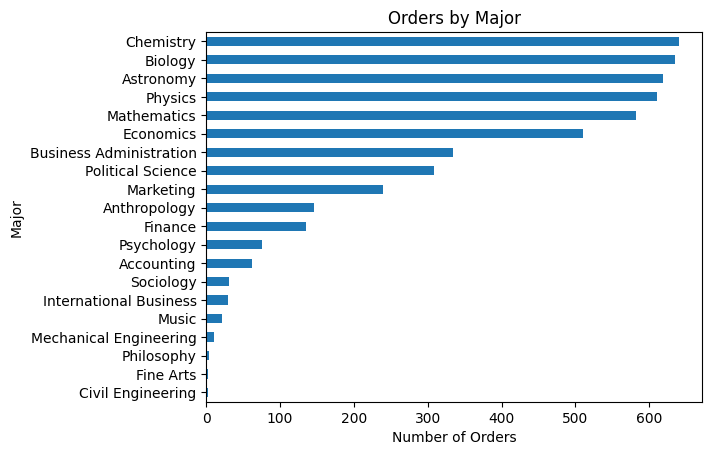

In [6]:
order_data["Major"].value_counts(ascending=True).plot.barh(xlabel="Number of Orders", title="Orders by Major")

<Axes: title={'center': 'Orders by Campus'}, xlabel='Number of Orders', ylabel='University'>

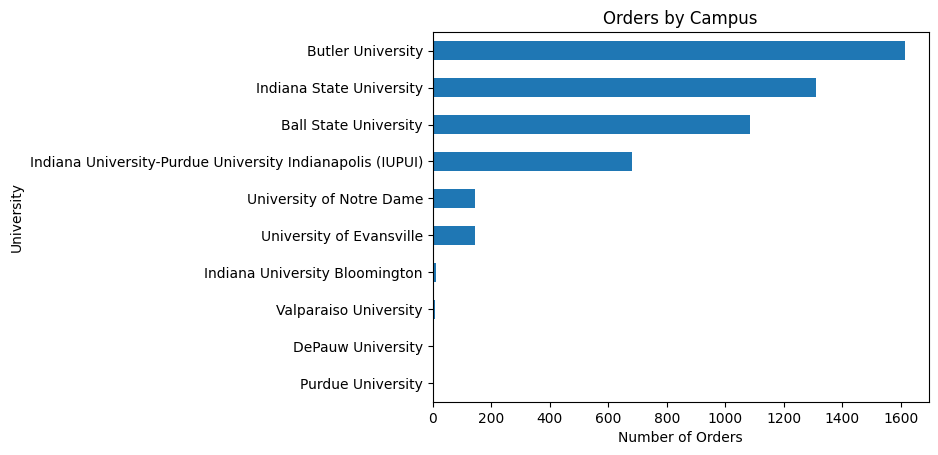

In [7]:
order_data["University"].value_counts(ascending=True).plot.barh(xlabel="Number of Orders", title="Orders by Campus")

<Axes: title={'center': 'Orders by Time'}, xlabel='Time', ylabel='Number of Orders'>

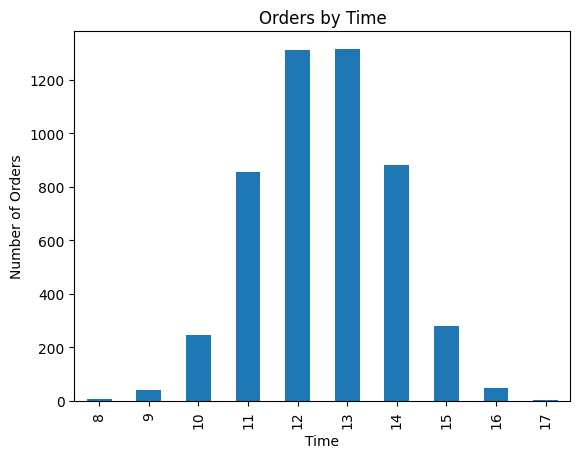

In [8]:
order_data["Time"].value_counts().sort_index().plot(kind="bar", ylabel="Number of Orders", title="Orders by Time")

<Axes: title={'center': 'Sales by Time'}, xlabel='Time', ylabel='Total Sales'>

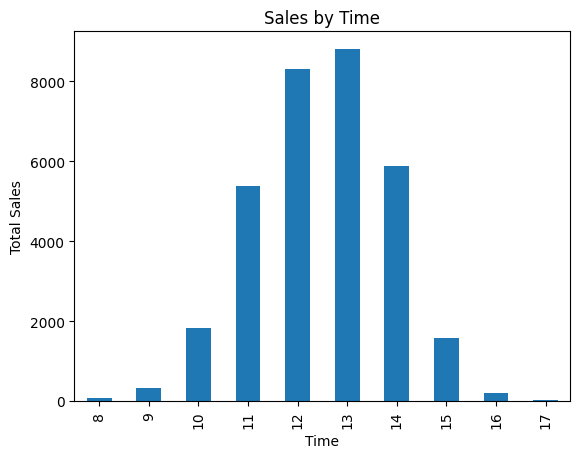

In [9]:
combined.groupby(['Time'])['Price'].sum().sort_index().plot(kind="bar", ylabel="Total Sales", title="Sales by Time")

<Axes: title={'center': 'Mean Sale by Time'}, xlabel='Time', ylabel='Mean Sale'>

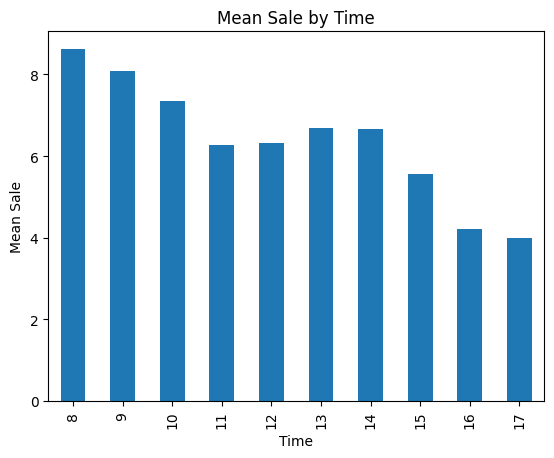

In [10]:
combined.groupby(['Time'])['Price'].mean().sort_index().plot(kind="bar", ylabel="Mean Sale", title="Mean Sale by Time")

The orders by time graph shows us that sales really start picking up at 10 AM, and slow down by 4 PM. The business could consider cutting hours outside that range in order to save on operating costs, depending on if those savings outweigh the few sales that the food truck brings in outside peak hours. The sales by time graph pretty much reflects the orders by time graph, but intrestingly we see that 1 PM has a small edge over 12 PM in terms of sales even though they are neck and neck in order counts. The mean sale by time graph is interesting. It could suggest that people spend more in the morning, although the sample size for 8, 9 and 10 AM is pretty small so we can't draw a sound conclusion.

<Axes: title={'center': 'Order Distribution'}, xlabel='Count', ylabel='Order'>

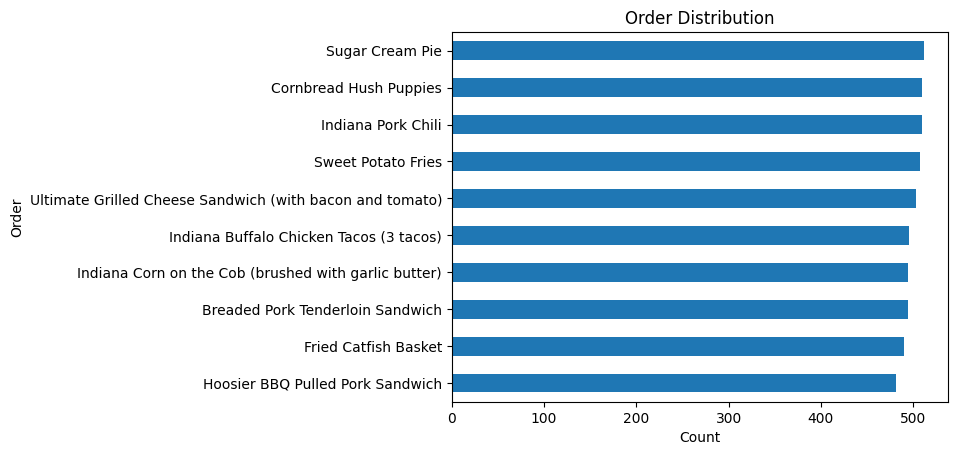

In [11]:
order_data["Order"].value_counts(ascending=True).plot(kind="barh", xlabel="Count", title="Order Distribution")

The orders are pretty evenly distributed, with none significantly more popular than others.

In [12]:
# Encode the data to find pearson correlations
order_data_encoded = combined.copy()
order_data_encoded['Major'] = order_data_encoded['Major'].astype('category').cat.codes
order_data_encoded['University'] = order_data_encoded['University'].astype('category').cat.codes
order_data_encoded['Order'] = order_data_encoded['Order'].astype('category').cat.codes
correlations = order_data_encoded.corr()
correlations["Order"][:4]
correlations.iloc[:-2, :-2].style.background_gradient(cmap='coolwarm')

,Year,Major,University,Time,Order
Year,1.000000,-0.007961,0.022057,-0.015790,-0.114357
Major,-0.007961,1.000000,0.030750,-0.000367,0.018405
University,0.022057,0.030750,1.000000,0.166331,-0.077829
Time,-0.015790,-0.000367,0.166331,1.000000,0.368199
Order,-0.114357,0.018405,-0.077829,0.368199,1.000000


The table above shows the pearson correlation between each column. Time has a low positive correlation with the order type.

<Axes: title={'center': 'Order Distribution by Top 3 Majors'}, xlabel='Frequency', ylabel='Order'>

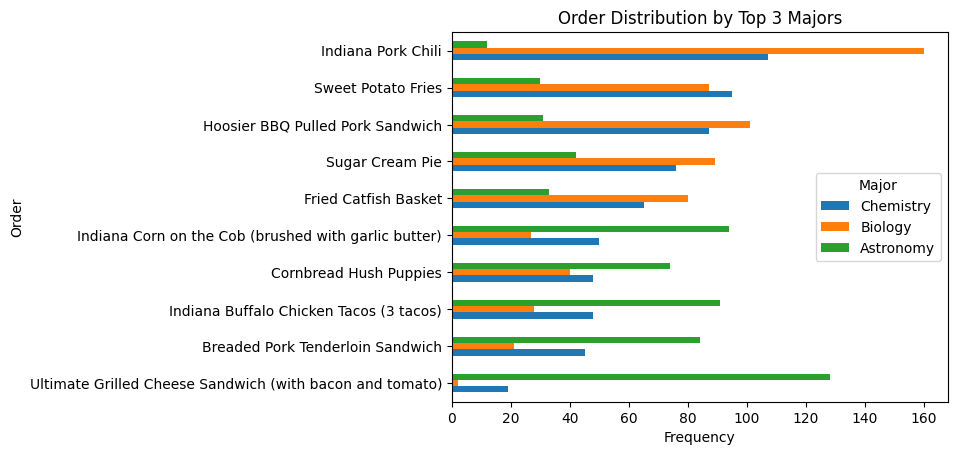

In [13]:
# Distribution of orders by top 3 majors
majors = ["Chemistry", "Biology", "Astronomy"]
order_by_popular_majors = order_data.groupby(['Major', 'Order']).size()[majors].unstack().T
order_by_popular_majors.sort_values(by=majors).plot(kind="barh", title="Order Distribution by Top 3 Majors", xlabel="Frequency")

I wanted to get some insight into how a student's major and their order are related to see how useful the major is as a predictor. The graph above shows the distribution of orders for the top three represented majors in the data. The data is sorted by the Chemistry major's frequencies. There are some interesting conclusions that can be drawn from this data. For example, Astronomy majors preferences are almost inversely related to chemistry major's preferences as we can see the green bars generally increasing from top to bottom. Biology majors seem to have similar preferences to chemistry majors in many cases.

In [14]:
# Most popular order by major
order_by_major = order_data.groupby(['Major', 'Order']).size().unstack(fill_value=0)
order_by_major.idxmax(axis=1)

Major
Accounting                 Indiana Corn on the Cob (brushed with garlic b...
Anthropology                                Hoosier BBQ Pulled Pork Sandwich
Astronomy                  Ultimate Grilled Cheese Sandwich (with bacon a...
Biology                                                   Indiana Pork Chili
Business Administration    Ultimate Grilled Cheese Sandwich (with bacon a...
Chemistry                                                 Indiana Pork Chili
Civil Engineering          Indiana Corn on the Cob (brushed with garlic b...
Economics                                                 Indiana Pork Chili
Finance                              Indiana Buffalo Chicken Tacos (3 tacos)
Fine Arts                                               Fried Catfish Basket
International Business                      Breaded Pork Tenderloin Sandwich
Marketing                                   Breaded Pork Tenderloin Sandwich
Mathematics                Ultimate Grilled Cheese Sandwich (with baco

In [15]:
# Average sale, number of sales, and total sales by university
price_by_major = combined.groupby(['University'])[["Price"]].mean()
price_by_major["Num Sales"] = combined["University"].value_counts()
price_by_major.columns = ['Avg Sale', 'Num Sales']
price_by_major["Total Sales"] = price_by_major["Avg Sale"] * price_by_major["Num Sales"]
price_by_major = price_by_major.sort_values(by="Total Sales", ascending=False)
price_by_major

,Avg Sale,Num Sales,Total Sales
University,,,
Butler University,6.240397,1614,10072.0
Indiana State University,6.880061,1309,9006.0
Ball State University,5.903226,1085,6405.0
Indiana University-Purdue University Indianapolis (IUPUI),7.202346,682,4912.0
University of Evansville,7.209790,143,1031.0
University of Notre Dame,5.666667,144,816.0
Indiana University Bloomington,5.666667,12,68.0
Valparaiso University,4.888889,9,44.0
DePauw University,9.000000,1,9.0


The table above shows the average sale price, number of sales, and total sales by University. This is interesting because while campuses like Butler, Indiana State, and Ball State have the highest total sales, IUPUI and the University of Evansville have a higher average sale price with a decent number of samples. This means that the business could increase revenue by expanding more into these campuses where students tend to spend more money. This does not necessarily mean more profit however because we are only looking at the average sale, not the average profit per sale.

### Part 2: Implications of data collection, storage, and biases
---
#### Ethical Implications
Collecting data has ethical implications including privacy, transparency, and consent. Data collection is also subject to many state and federal laws, so it is important to be transparent about the usage of data, get consent during collection, and maintain customer privacy. Luckily, the data in the orders dataset does not include personally indentifiable information and only contains information that can be found in a university directory like year and major. The time of the order is also not private information. Thus the data is ok to store and analyze biases.

#### Business Outcome Implications
As we saw in the exploratory analysis, the collected data can give us insights to guide business decisions and improve business outcomes. Therefore collecting more data could improve business outcomes by giving the business better insights into their customers. Of course, this must be done with consideration to ethics.

Storing data could augment business outcomes because historical data is useful to identify trends in the market. Identifying trends is useful for making well informed decisions. For example, in the exploratory anaylsis we recognized that the average sale price at certain campuses was higher even if they had less net sales, so expanding operations in those campuses could lead to more revenue. Furthermore, we identified a trend in the most popular time of day, and found hours that could potentially be shaved off to save on operating costs.

Biases in data can also impact business outcomes as it can affect the conclusions drawn from analysis. For example, all the analysis done above must be considered in the context of the data heavily overrepresenting sophomores and juniors, with very few samples for freshman and seniors. Regardless of why this is the case, it raises questions such as: would the universities ranked by sales be different if 1st years and 4th years were more evenly represented? Furthermore for universities underrepresented in the data, is that because student there by less or because there are less food trucks there? These are the kinds of things that must be considered in the context of biases.

#### Technical Implications
The technical implications of data collection includes the technologies required to collect and analyze data. Collecting data requires software including a survey UI and possibly a backed to store the data. In this case, we already have some data so collection can probably be continued using the existing technology stack. Analyzing data requires compute power and also software to analyze that data. Right now, FoodX has a small amount of data so they can meet their use case by simply using python and pandas because the entire dataset can easily sit in a laptop's memory. However if they scaled up their data collection and ended up with hundreds of gigabytes or terrabytes of data, they might consider cloud based solutions such as Microsoft's PowerBI or Google's Data Studio.

In terms of data storage, the technical implications depend on the use case and the size of the dataset. Data can be stored on site on hardware the business owns, or it can be stored in the cloud. Furthermore the format that the data is stored in also depends on the use case. For a small dataset like this, an excel sheet is fine but if FoodX decides to expand data collection and have more complex tables with much more data they might consider storing their data in a relational database such as mySQL where it can be efficiently queried.

The technical implications of biases in the context of this data relate mostly to the year, major, and university columns. The bias against first years and second years as discussed above can affect some of the technical choices we make. For example, the pearson coefficient is an effective description of the data when both variables have a normal distribution and show a representative sample. The year, major, and university columns do not have normal distributions and they may or may not show a representative sample depending on how the data was collected. Therefore, we may opt to choose other metrics such as the spearman or kendall coefficient.






### Part 3: Making the model

In [16]:
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from joblib import dump, load

# Ignore warnings on all threads (prevent warning spam from GridSearchCV)
import warnings
import os
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

#### Model Selection
The first thing to do is to prepare the data for input into the model. For that we need to encode the categorical variables like Year, Major, University, and Order. Time is already an integer so we can leave it as is. 

#### Data Preprocessing
We also need to keep track of the encoding we use now, ie what category maps to what number. This is because we need to encode new data the same way later, and reverse the encoding for model outputs.

In [17]:
# Create a dictionary, where each entry as a list of unique categories for each column.
# Ensures encoding scheme is consistent
# This will be needed to encode new data data later, and also unencode model outputs.
raw_dataset = pd.read_csv("order_data.csv")
encodings_dict = {colName: list(raw_dataset[colName].astype('category').cat.categories) for colName in raw_dataset.columns}

In [18]:
# This function loads and encodes the data
def load_data(path):
    # Read the data from csv file
    dataset = pd.read_csv(path)
    # Encode the string columns of the dataset according to our encodings_dict
    for colName in dataset.columns:
        # check if column is not numeric
        if dataset[colName].dtype.kind not in 'biufc':
            dataset[colName] = [encodings_dict[colName].index(x) for x in dataset[colName]]
    return dataset

Now we can split the data into train and test sets. I chose to use a third of the data for testing.

In [19]:
# Split data into train and test sets
dataset = load_data("order_data.csv")
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
dataset.head()

,Year,Major,University,Time,Order
0,1,16,3,12,2
1,2,5,0,14,7
2,2,5,1,12,6
3,1,3,3,11,2
4,2,4,1,12,5


This is a classification task because we need to determine a "class" or in our case an "order" given a set of features. Therefore, I would opt to use a tree-based model such as XGBClassifier from xgboost or GradientBoostingClassifier from sklearn. Tree-based models generally excel at classification tasks. I am also going to test LogisticRegression, MLPClassifier, and a support vector machine (SVC) which are also popular choices for multiclass classification. I used the following cells to take a quick look at how each model performs. The metric used is accuracy.

In [20]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

Accuracy:  0.6424242424242425


In [21]:
model = XGBClassifier()
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

Accuracy:  0.6509090909090909


In [22]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

Accuracy:  0.64


In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

Accuracy:  0.43272727272727274


In [24]:
model = MLPClassifier(max_iter=1000)
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

Accuracy:  0.5290909090909091


In [25]:
model = SVC()
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))

Accuracy:  0.5236363636363637


The tree classifiers seem to be performing the best so I will move forward with those.

The next step is to tune the hyperparameters to get the best performance out of the model. Since this is a small dataset I chose to use grid search to check each combination of parameters, rather than randomized search or another method. Specifically i'm using GridSearchCV from sklearn which has built in five-fold cross validation. This means the data used for training and testing is shuffled so that the model performance can be evaluated with different parts of the data being used as the test set.

For the grid search space, I chose a couple values for key parameters in each model.

In [26]:
# Hyper Parameter tuning for XGBClassifier
model = XGBClassifier(n_jobs=-1, verbosity=0)
param_grid = {
    'n_estimators': [100, 200, 500],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
}
clf = GridSearchCV(model, param_grid, n_jobs=-1, verbose=0)
grid_search_result = clf.fit(X_train, y_train)
print("Best score: %f with params: %s" % (grid_search_result.best_score_, grid_search_result.best_params_))

Best score: 0.654925 with params: {'gamma': 0, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1}


In [27]:
# Hyper Parameter tuning for GradientBoostingClassifier
model = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5],
    'min_samples_split': [1, 2, 5, 10],
    'max_leaf_nodes': [5, 20, 50, None],
}
clf = GridSearchCV(model, param_grid, n_jobs=-1, verbose=0)
grid_search_result = clf.fit(X_train, y_train)
print("Bestscore : %f with params: %s" % (grid_search_result.best_score_, grid_search_result.best_params_))

Bestscore : 0.659403 with params: {'max_depth': 3, 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 200}


In [28]:
# Hyper Parameter tuning for ExtraTreesClassifier
model = ExtraTreesClassifier()
param_grid = {
    'n_estimators': [100, 200, 500],
    'min_samples_split': [1, 2, 5, 10],
    'max_leaf_nodes': [5, 20, 50, None],
}
clf = GridSearchCV(model, param_grid, n_jobs=-1, verbose=0)
grid_search_result = clf.fit(X_train, y_train)
print("Best: %f with params: %s" % (grid_search_result.best_score_, grid_search_result.best_params_))

Best: 0.638806 with params: {'max_leaf_nodes': None, 'min_samples_split': 10, 'n_estimators': 200}


#### Final Model Selection
Based on the results of hyperparameter tuning I decided to select the **GradientBoostingClassifier** which had slightly better performance than the other two classifiers.

The following cell defines the function to train the final model on all the given data. This trained model is then pickled and can be used on the hidden data.

In [29]:
def train_final_model(dataset):
    # This function will train the model on the entire given dataset and pickle it.
    # The returned model can then be used for classifying unseen data.
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    final_model = GradientBoostingClassifier(max_depth=3, max_leaf_nodes=20, min_samples_split=2, n_estimators=200)
    model.fit(X, y)
    # dump model to .joblib file
    dump(model, 'final_model.joblib')

Now using the load_dataset function defined above and train_model just defined, we can predict the orders of new students. To test the final model utilization process, I made a fake dataset called `unseen_data.csv`. The following cell shows the workflow for using the model on a new dataset, as is the usecase of FoodX.

In [30]:
given_data = load_data("order_data.csv")
unseen_data = load_data("unseen_data.csv")

# first train the model on the entire given dataset
train_final_model(given_data)
# load the model from .joblib file
final_model = load('final_model.joblib')
# Make predictions and un-encode them using the encodings_dict maintained from earlier.
encoded_predictions = final_model.predict(unseen_data)
predictions = [encodings_dict['Order'][x] for x in encoded_predictions]

# Add the predictions column to the unseen data so we can see them side by side
unseen_data_raw = pd.read_csv("unseen_data.csv")
unseen_data_raw["Predicted Order"] = predictions
unseen_data_raw

,Year,Major,University,Time,Predicted Order
0,Year 3,Chemistry,Indiana State University,12,Cornbread Hush Puppies
1,Year 2,Physics,Ball State University,13,Indiana Pork Chili


### Part 4: Reflection
---
We now have a model that can be used to predict the order of a student based on their Year, Major, University, and Time of order.
The best performance of the model was a 65.9% accuracy during model selection. Assuming the model performs similarly on unseen data and is not overfitted, that means FoodX would be offering discounts for about 34.1% of orders.

We can get an idea of how much this would cost the business by applying those numbers to our given data.

In [31]:
# Choose a random 34.1% of orders, apply the discount, and calculate the totals
total = combined["Price"].size
to_discount = int(total * 0.341)
idxs = np.arange(total)
np.random.shuffle(idxs)
idxs_to_discount = idxs[:to_discount]
idxs_no_discount = idxs[to_discount:]
total_sales_discount = np.sum(combined["Price"][idxs_to_discount] * 0.9) + np.sum(combined["Price"][idxs_no_discount])
total_sales = np.sum(combined["Price"])
print("Total Sales applying 10% discounts according to Model performance: ", round(total_sales_discount, 2))
print("Total Sales without discounts: ", total_sales)
print("Percentage Loss: ", round((total_sales - total_sales_discount) / total_sales * 100, 2))

Total Sales applying 10% discounts according to Model performance:  31258.3
Total Sales without discounts:  32369
Percentage Loss:  3.43


The number varies according to which orders end up getting discounted, but this gives us a percentage loss in revenue to expect. Depending on how this loss in revenue trades off with sales generated from the discount program, the model can be implemented or not. Or, the discount amount can be adjusted until it is profitable. The work and resources needed to make and host the model also need to be considered.

Some potential next steps include gathering more features that correlate better with the student's order because the current features all have low correlation. Also doing more feature engineering with existing features including removing outliers and normalizing any skewed distributions. 